In [124]:
from modsim import *

%matplotlib inline

In [125]:
from pandas import read_csv #reads webpage, creates DataFrames

In [267]:
filename = 'data/Japan Project.csv'
tables = read_csv(filename, header=0, index_col =0, decimal='M')

In [268]:
table1=tables
table1.columns = ['youth', 'middle', 'elder', 'total'] #renames table columns
table1 #prints data table

,youth,middle,elder,total
Time,,,,
1960,27994280,59307022,5199270,92500572
1961,27921824,61581780,5439396,94943000
1962,27291398,62947183,5593419,95832000
1963,26643474,64412633,5755894,96812000
1964,26051595,65850711,5923694,97826000
1965,25576728,67208139,6098133,98883000
1966,25282977,68212420,6294603,99790000
1967,25039007,69186599,6499394,100725000
1968,24736042,69656907,6668051,101061000


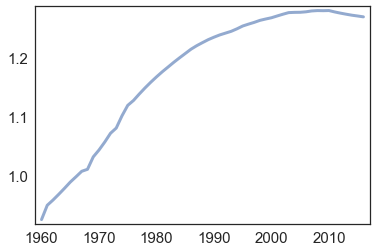

In [269]:
total = table1.total / 1e8
newfig()
plot(total)

In [270]:
t0 = total.index[0]
t_end = 2050
total_total_growth = total[total.index[-1]] - total[t0]
elapsed_time = total.index[-1] - t0
total_annual_growth = total_total_growth / elapsed_time
total_annual_growth

0.0061596319642857151

In [271]:
system = System(t0=t0,
                t_end = t_end,
                p0 = total[1960],
                annual_growth = total_annual_growth)

In [272]:
def run_simulationt(system, update_func):
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results

In [273]:
def update_func(pop, t, system):
    net_growth = system.alpha * pop + system.beta * pop**2 
    return pop + net_growth

In [274]:
def plot_results(system, title=None):
    newfig()
    plot(total)
    plot(system.results,'--', color='blue',label='Model')
    decorate(xlabel='Year',
            ylabel='Japanese Population (1e8)',
            title=title)

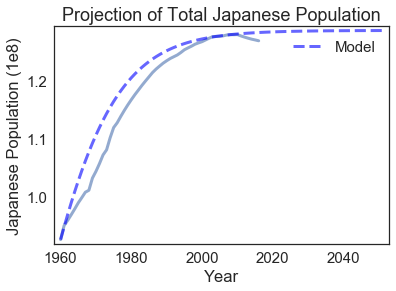

In [298]:
for t
'in range(1960):
    if t < 2010:
        system.alpha = 0.085
        system.beta = -0.066
    else:
        system.alpha = -0.04
        system.beta = 0.03
    
run_simulationt(system, update_func)
plot_results(system, title='Projection of Total Japanese Population')

TypeError: 'TimeSeries' object is not callable